In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later.
T = 10
D = 1 
X = []
Y = []

def get_label(x, i1, i2, i3): 
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T) # x는 랜덤값... 
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance 
# y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [12]:
# Try a linear model first - note: it is classification now!
i= Input(shape=(T, ))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the network
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 473us/sample - loss: 0.8153 - acc: 0.4996 - val_loss: 0.7077 - val_acc: 0.5252
Epoch 2/100
2500/2500 [==============================] - 0s 43us/sample - loss: 0.6994 - acc: 0.4944 - val_loss: 0.6921 - val_acc: 0.5296
Epoch 3/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.6950 - acc: 0.4996 - val_loss: 0.6927 - val_acc: 0.5208
Epoch 4/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.6947 - acc: 0.5048 - val_loss: 0.6923 - val_acc: 0.5276
Epoch 5/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.6952 - acc: 0.5064 - val_loss: 0.6921 - val_acc: 0.5104
Epoch 6/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.6954 - acc: 0.4876 - val_loss: 0.6927 - val_acc: 0.5304
Epoch 7/100
2500/2500 [==============================] - 0s 44us/sample - loss: 0.6950 - acc: 0.5020 - val_loss: 0.6925 - v

2500/2500 [==============================] - 0s 41us/sample - loss: 0.6952 - acc: 0.5104 - val_loss: 0.6914 - val_acc: 0.5224
Epoch 60/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.6952 - acc: 0.5004 - val_loss: 0.6921 - val_acc: 0.5252
Epoch 61/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.6954 - acc: 0.5016 - val_loss: 0.6934 - val_acc: 0.5252
Epoch 62/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.6964 - acc: 0.4992 - val_loss: 0.6924 - val_acc: 0.5136
Epoch 63/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.6955 - acc: 0.5172 - val_loss: 0.6928 - val_acc: 0.5156
Epoch 64/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.6948 - acc: 0.5004 - val_loss: 0.6920 - val_acc: 0.5192
Epoch 65/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.6951 - acc: 0.5056 - val_loss: 0.6916 - val_acc: 0.5364
Epoch 66/100
2500/2500 [================

79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9584

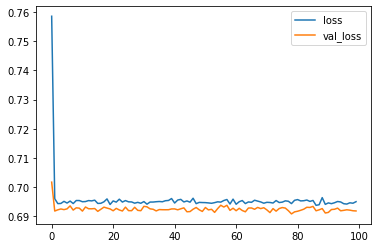

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

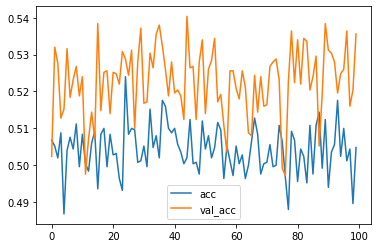

In [9]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

In [10]:
### Now try simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)
# x = LSTM(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy']
)

In [11]:
# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 0s 147us/sample - loss: 0.6694 - acc: 0.5964 - val_loss: 0.6536 - val_acc: 0.6432
Epoch 2/200
2500/2500 [==============================] - 0s 87us/sample - loss: 0.6226 - acc: 0.6968 - val_loss: 0.5935 - val_acc: 0.7224
Epoch 3/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.5563 - acc: 0.7656 - val_loss: 0.5155 - val_acc: 0.7808
Epoch 4/200
2500/2500 [==============================] - 0s 87us/sample - loss: 0.4840 - acc: 0.8132 - val_loss: 0.4376 - val_acc: 0.8420
Epoch 5/200
2500/2500 [==============================] - 0s 88us/sample - loss: 0.4076 - acc: 0.8624 - val_loss: 0.3773 - val_acc: 0.8728
Epoch 6/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.3508 - acc: 0.8888 - val_loss: 0.3293 - val_acc: 0.8940
Epoch 7/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.3125 - acc: 0.9076 - val_loss: 0.3054 - v

2500/2500 [==============================] - 0s 88us/sample - loss: 0.1369 - acc: 0.9544 - val_loss: 0.1472 - val_acc: 0.9604
Epoch 60/200
2500/2500 [==============================] - 0s 88us/sample - loss: 0.1357 - acc: 0.9596 - val_loss: 0.1477 - val_acc: 0.9560
Epoch 61/200
2500/2500 [==============================] - 0s 95us/sample - loss: 0.1302 - acc: 0.9600 - val_loss: 0.1674 - val_acc: 0.9448
Epoch 62/200
2500/2500 [==============================] - 0s 89us/sample - loss: 0.1406 - acc: 0.9536 - val_loss: 0.1489 - val_acc: 0.9464
Epoch 63/200
2500/2500 [==============================] - 0s 88us/sample - loss: 0.1278 - acc: 0.9568 - val_loss: 0.1582 - val_acc: 0.9460
Epoch 64/200
2500/2500 [==============================] - 0s 87us/sample - loss: 0.1272 - acc: 0.9636 - val_loss: 0.1464 - val_acc: 0.9552
Epoch 65/200
2500/2500 [==============================] - 0s 91us/sample - loss: 0.1316 - acc: 0.9620 - val_loss: 0.1611 - val_acc: 0.9476
Epoch 66/200
2500/2500 [================

Epoch 118/200
2500/2500 [==============================] - 0s 91us/sample - loss: 0.1103 - acc: 0.9684 - val_loss: 0.1352 - val_acc: 0.9488
Epoch 119/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.1087 - acc: 0.9680 - val_loss: 0.1307 - val_acc: 0.9580
Epoch 120/200
2500/2500 [==============================] - 0s 88us/sample - loss: 0.1143 - acc: 0.9636 - val_loss: 0.1782 - val_acc: 0.9396
Epoch 121/200
2500/2500 [==============================] - 0s 87us/sample - loss: 0.1228 - acc: 0.9540 - val_loss: 0.1810 - val_acc: 0.9352
Epoch 122/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.1159 - acc: 0.9620 - val_loss: 0.1699 - val_acc: 0.9508
Epoch 123/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.1123 - acc: 0.9624 - val_loss: 0.1358 - val_acc: 0.9532
Epoch 124/200
2500/2500 [==============================] - 0s 88us/sample - loss: 0.1133 - acc: 0.9632 - val_loss: 0.1356 - val_acc: 0.9568
Epoch 125/200
2500/2

2500/2500 [==============================] - 0s 87us/sample - loss: 0.1028 - acc: 0.9652 - val_loss: 0.1257 - val_acc: 0.9572
Epoch 177/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.0995 - acc: 0.9668 - val_loss: 0.1252 - val_acc: 0.9608
Epoch 178/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.0988 - acc: 0.9668 - val_loss: 0.1225 - val_acc: 0.9608
Epoch 179/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.1028 - acc: 0.9700 - val_loss: 0.1265 - val_acc: 0.9640
Epoch 180/200
2500/2500 [==============================] - 0s 87us/sample - loss: 0.1024 - acc: 0.9624 - val_loss: 0.1261 - val_acc: 0.9544
Epoch 181/200
2500/2500 [==============================] - 0s 86us/sample - loss: 0.0997 - acc: 0.9652 - val_loss: 0.1254 - val_acc: 0.9580
Epoch 182/200
2500/2500 [==============================] - 0s 87us/sample - loss: 0.1189 - acc: 0.9632 - val_loss: 0.1157 - val_acc: 0.9636
Epoch 183/200
2500/2500 [=========

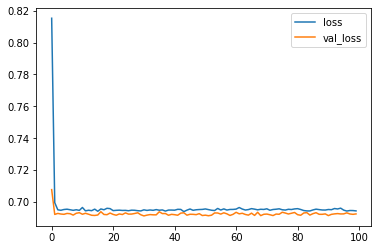

In [14]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9584

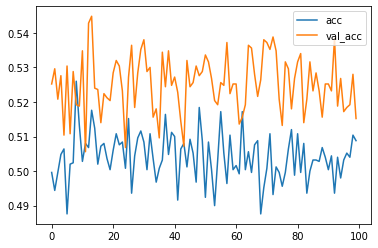

In [15]:
# plot some data
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [16]:
# Now change to the long distance problem
# Start with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [17]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 265us/sample - loss: 0.7040 - acc: 0.4968 - val_loss: 0.6955 - val_acc: 0.5028
Epoch 2/200
2500/2500 [==============================] - 0s 94us/sample - loss: 0.6954 - acc: 0.5004 - val_loss: 0.6976 - val_acc: 0.4988
Epoch 3/200
2500/2500 [==============================] - 0s 96us/sample - loss: 0.6947 - acc: 0.5080 - val_loss: 0.6920 - val_acc: 0.5172
Epoch 4/200
2500/2500 [==============================] - 0s 95us/sample - loss: 0.6835 - acc: 0.5436 - val_loss: 0.6761 - val_acc: 0.5808
Epoch 5/200
2500/2500 [==============================] - 0s 95us/sample - loss: 0.6697 - acc: 0.5872 - val_loss: 0.6786 - val_acc: 0.5736
Epoch 6/200
2500/2500 [==============================] - 0s 95us/sample - loss: 0.6614 - acc: 0.5924 - val_loss: 0.6642 - val_acc: 0.5892
Epoch 7/200
2500/2500 [==============================] - 0s 96us/sample - loss: 0.6568 - acc: 0.6072 - val_loss: 0.6767 - v

2500/2500 [==============================] - 0s 90us/sample - loss: 0.5311 - acc: 0.7600 - val_loss: 0.5279 - val_acc: 0.7620
Epoch 60/200
2500/2500 [==============================] - 0s 93us/sample - loss: 0.4789 - acc: 0.7984 - val_loss: 0.4943 - val_acc: 0.7912
Epoch 61/200
2500/2500 [==============================] - 0s 94us/sample - loss: 0.4895 - acc: 0.7940 - val_loss: 0.5252 - val_acc: 0.7676
Epoch 62/200
2500/2500 [==============================] - 0s 91us/sample - loss: 0.4884 - acc: 0.7924 - val_loss: 0.5153 - val_acc: 0.7736
Epoch 63/200
2500/2500 [==============================] - 0s 88us/sample - loss: 0.5286 - acc: 0.7576 - val_loss: 0.7259 - val_acc: 0.6292
Epoch 64/200
2500/2500 [==============================] - 0s 87us/sample - loss: 0.6057 - acc: 0.6900 - val_loss: 0.5690 - val_acc: 0.7272
Epoch 65/200
2500/2500 [==============================] - 0s 92us/sample - loss: 0.4819 - acc: 0.7996 - val_loss: 0.5117 - val_acc: 0.7768
Epoch 66/200
2500/2500 [================

Epoch 118/200
2500/2500 [==============================] - 0s 89us/sample - loss: 0.4580 - acc: 0.8136 - val_loss: 0.4696 - val_acc: 0.8096
Epoch 119/200
2500/2500 [==============================] - 0s 90us/sample - loss: 0.4416 - acc: 0.8180 - val_loss: 0.4798 - val_acc: 0.8016
Epoch 120/200
2500/2500 [==============================] - 0s 89us/sample - loss: 0.4549 - acc: 0.8140 - val_loss: 0.5096 - val_acc: 0.7648
Epoch 121/200
2500/2500 [==============================] - 0s 89us/sample - loss: 0.4515 - acc: 0.8048 - val_loss: 0.4625 - val_acc: 0.8104
Epoch 122/200
2500/2500 [==============================] - 0s 93us/sample - loss: 0.4305 - acc: 0.8288 - val_loss: 0.5051 - val_acc: 0.7888
Epoch 123/200
2500/2500 [==============================] - 0s 90us/sample - loss: 0.4802 - acc: 0.8012 - val_loss: 0.5144 - val_acc: 0.7732
Epoch 124/200
2500/2500 [==============================] - 0s 90us/sample - loss: 0.4822 - acc: 0.8012 - val_loss: 0.4734 - val_acc: 0.8036
Epoch 125/200
2500/2

2500/2500 [==============================] - 0s 88us/sample - loss: 0.5259 - acc: 0.7724 - val_loss: 0.4951 - val_acc: 0.7944
Epoch 177/200
2500/2500 [==============================] - 0s 89us/sample - loss: 0.6528 - acc: 0.6332 - val_loss: 0.6784 - val_acc: 0.5740
Epoch 178/200
2500/2500 [==============================] - 0s 91us/sample - loss: 0.6746 - acc: 0.5752 - val_loss: 0.6730 - val_acc: 0.5868
Epoch 179/200
2500/2500 [==============================] - 0s 90us/sample - loss: 0.6672 - acc: 0.5872 - val_loss: 0.6709 - val_acc: 0.5908
Epoch 180/200
2500/2500 [==============================] - 0s 89us/sample - loss: 0.6651 - acc: 0.5976 - val_loss: 0.6727 - val_acc: 0.5960
Epoch 181/200
2500/2500 [==============================] - 0s 88us/sample - loss: 0.6688 - acc: 0.5868 - val_loss: 0.6661 - val_acc: 0.5960
Epoch 182/200
2500/2500 [==============================] - 0s 90us/sample - loss: 0.6628 - acc: 0.6008 - val_loss: 0.6664 - val_acc: 0.6044
Epoch 183/200
2500/2500 [=========

79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9584

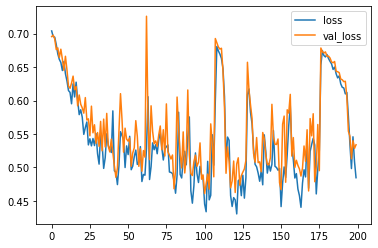

In [18]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

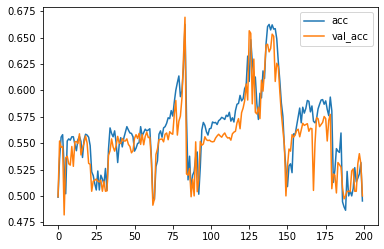

In [14]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [15]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6954 - accuracy: 0.4940 - val_loss: 0.6941 - val_accuracy: 0.5080
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5116 - val_loss: 0.6944 - val_accuracy: 0.4992
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6946 - accuracy: 0.4944 - val_loss: 0.6948 - val_accuracy: 0.5048
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5072 - val_loss: 0.6950 - val_accuracy: 0.4980
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6943 - val_accuracy: 0.5028
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6945 - val_accuracy: 0.4856
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5180 - val_loss: 0.6954 - val_accuracy: 0.5080
Epoch 8/200


79/79 [==============================] - 0s 6ms/step - loss: 0.0194 - accuracy: 0.9944 - val_loss: 0.0323 - val_accuracy: 0.9916

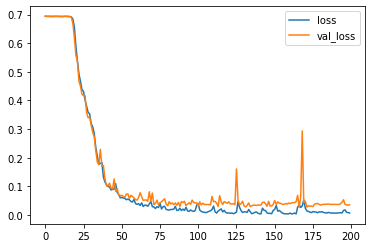

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

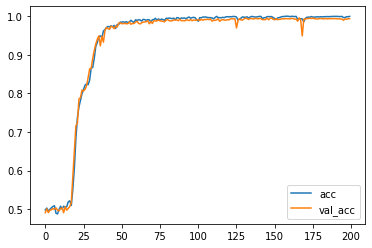

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7094 - accuracy: 0.5020 - val_loss: 0.6961 - val_accuracy: 0.4976
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5104 - val_loss: 0.6937 - val_accuracy: 0.4936
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5172 - val_loss: 0.6949 - val_accuracy: 0.4972
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5064 - val_loss: 0.6957 - val_accuracy: 0.5036
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5240 - val_loss: 0.6944 - val_accuracy: 0.4976
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5224 - val_loss: 0.6962 - val_accuracy: 0.5020
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5176 - val_loss: 0.6957 - val_accuracy: 0.4872
Epoch 8/200
7

79/79 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5272 - val_loss: 0.6909 - val_accuracy: 0.5396

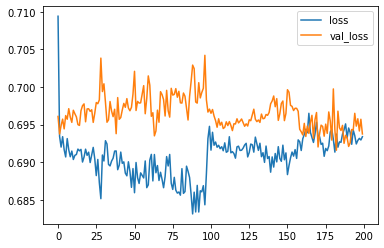

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

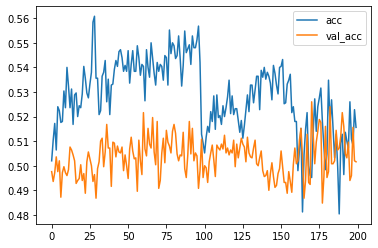

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6937 - accuracy: 0.5108 - val_loss: 0.6933 - val_accuracy: 0.5092
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.4968 - val_loss: 0.6951 - val_accuracy: 0.5016
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.5048 - val_loss: 0.6934 - val_accuracy: 0.5076
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6928 - accuracy: 0.5196 - val_loss: 0.6935 - val_accuracy: 0.4976
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6926 - accuracy: 0.5112 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6929 - accuracy: 0.5156 - val_loss: 0.6938 - val_accuracy: 0.5024
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5036 - val_loss: 0.6930 - val_accuracy: 0.5148
Epoch 8/20

79/79 [==============================] - 1s 9ms/step - loss: 0.4281 - accuracy: 0.8144 - val_loss: 0.4594 - val_accuracy: 0.8024

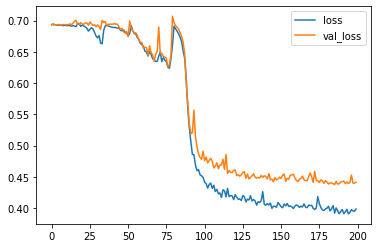

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

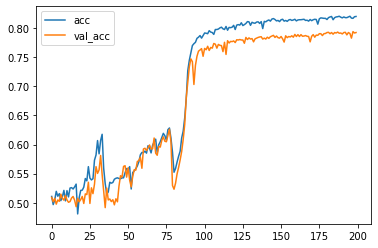

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6958 - accuracy: 0.4972 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6951 - accuracy: 0.4960 - val_loss: 0.6937 - val_accuracy: 0.5032
Epoch 3/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6928 - accuracy: 0.5180 - val_loss: 0.6935 - val_accuracy: 0.5156
Epoch 4/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6926 - accuracy: 0.5024 - val_loss: 0.6938 - val_accuracy: 0.5060
Epoch 5/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 6/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6941 - val_accuracy: 0.5060
Epoch 7/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6910 - accuracy: 0.5092 - val_loss: 0.6942 - val_accuracy: 0.5072
Epoch 

79/79 [==============================] - 1s 9ms/step - loss: 0.6402 - accuracy: 0.6328 - val_loss: 0.7593 - val_accuracy: 0.4972

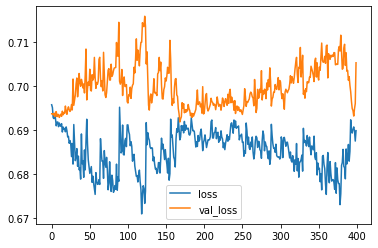

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

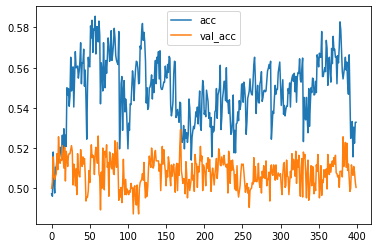

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6937 - accuracy: 0.5212 - val_loss: 0.6964 - val_accuracy: 0.4912
Epoch 2/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6920 - accuracy: 0.5204 - val_loss: 0.6976 - val_accuracy: 0.4868
Epoch 3/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6920 - accuracy: 0.5184 - val_loss: 0.6972 - val_accuracy: 0.4904
Epoch 4/400
79/79 [==============================] - 1s 13ms/step - loss: 0.6909 - accuracy: 0.5308 - val_loss: 0.6974 - val_accuracy: 0.4924
Epoch 5/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6892 - accuracy: 0.5424 - val_loss: 0.6958 - val_accuracy: 0.5060
Epoch 6/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6913 - accuracy: 0.5408 - val_loss: 0.6970 - val_accuracy: 0.4944
Epoch 7/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6887 - accuracy: 0.5480 - val_loss: 0.7006 - val_accuracy: 0.4884
Epoch 

79/79 [==============================] - 1s 10ms/step - loss: 0.6666 - accuracy: 0.5628 - val_loss: 0.7229 - val_accuracy: 0.4996

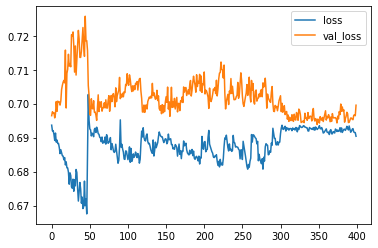

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

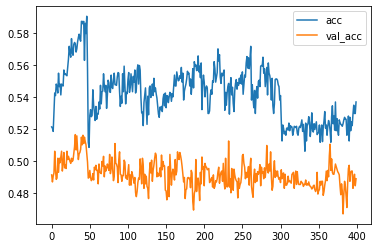

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Now test our LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 17ms/step - loss: 0.6938 - accuracy: 0.5200 - val_loss: 0.6984 - val_accuracy: 0.4852
Epoch 2/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6921 - accuracy: 0.5276 - val_loss: 0.6965 - val_accuracy: 0.4860
Epoch 3/100
79/79 [==============================] - 1s 13ms/step - loss: 0.6919 - accuracy: 0.5176 - val_loss: 0.6955 - val_accuracy: 0.4856
Epoch 4/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6901 - accuracy: 0.5268 - val_loss: 0.6917 - val_accuracy: 0.5072
Epoch 5/100
79/79 [==============================] - 1s 13ms/step - loss: 0.6807 - accuracy: 0.5364 - val_loss: 0.6711 - val_accuracy: 0.5524
Epoch 6/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6590 - accuracy: 0.5552 - val_loss: 0.6503 - val_accuracy: 0.5752
Epoch 7/100
79/79 [==============================] - 1s 13ms/step - loss: 0.6302 - accuracy: 0.6144 - val_loss: 0.6247 - val_accuracy: 0.6444
Epoch 

79/79 [==============================] - 1s 12ms/step - loss: 0.1289 - accuracy: 0.9508 - val_loss: 0.1830 - val_accuracy: 0.9352

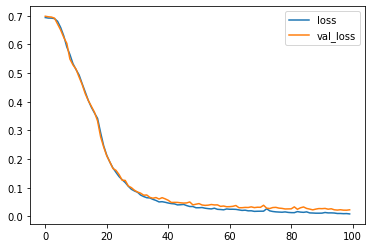

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

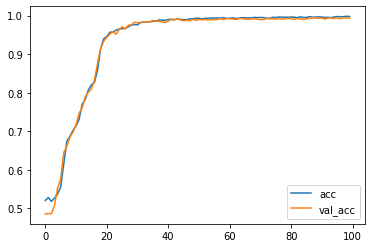

In [0]:
# plot some data
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()